In [82]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df_despesas = pd.read_excel("Despesas_Tratado.xlsx")
df_orcamento = pd.read_excel("Orcamento_Tratado.xlsx")

In [84]:
display(df_despesas)

,Setor,Mes,Ano,Valor_previsto,Valor_realizado,Data
0,Produção,1,2024,"14.045,42","15.524,52",01/2024
1,Produção,2,2024,"42.597,50","45.075,42",02/2024
2,Produção,3,2024,"39.491,52","44.155,59",03/2024
3,Produção,4,2024,"52.992,06","59.965,36",04/2024
4,Produção,5,2024,"16.198,93","15.988,45",05/2024
...,...,...,...,...,...,...
115,Comercial,8,2025,"73.532,49","63.496,66",08/2025
116,Comercial,9,2025,"46.526,55","270.703,31",09/2025
117,Comercial,10,2025,"42.068,07","43.491,56",10/2025
118,Comercial,11,2025,"79.706,26","92.876,93",11/2025


In [85]:
df_orcamento["Data"] = pd.to_datetime(df_orcamento["Data"])

# Formata a coluna 'Data' como 'mm/aaaa'
df_orcamento["Data"] = df_orcamento["Data"].dt.strftime('%m/%Y')

df_orcamento["Data"] = pd.to_datetime(df_orcamento["Data"])

df_orcamento["Trimestre"] = df_orcamento["Data"].dt.to_period('Q').astype(str)

# Agrupa por Data e Setor, somando os valores
despesas_area_Trimestre = df_orcamento.groupby(["Trimestre", "Setor"])["Valor"].sum()

# Exibe o resultado
print(despesas_area_Trimestre)

Trimestre  Setor     
2024Q2     Comercial      35361.83
           Financeiro     42564.69
           Logística      59932.02
           Produção       37614.67
           RH            176970.89
2024Q3     Comercial     200732.62
           Financeiro    154311.73
           Logística      96516.20
           Produção       36434.34
           RH             87134.09
2024Q4     Comercial     128168.29
           Financeiro     82044.54
           Logística     124575.99
           Produção       49729.88
           RH             58925.64
2025Q1     Comercial     284164.24
           Financeiro     64797.56
           Logística      61974.66
           Produção      204141.21
           RH             37743.17
2025Q2     Comercial      67027.83
           Financeiro     36925.76
           Logística      50547.87
           Produção       24755.19
           RH             34992.38
Name: Valor, dtype: float64


C:\Users\36188635861\AppData\Local\Temp\ipykernel_14132\497498122.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_orcamento["Data"] = pd.to_datetime(df_orcamento["Data"])
C:\Users\36188635861\AppData\Local\Temp\ipykernel_14132\497498122.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_orcamento["Data"] = pd.to_datetime(df_orcamento["Data"])


As despesas do Setor comercial são acima da média

In [86]:


# Filtra apenas as linhas com Tipo "Salário"
salario_df = df_orcamento[df_orcamento["Tipo"] == "Salário"]

# Agrupa por setor e soma os valores
salario_area = salario_df.groupby("Setor")["Valor"].sum()

print(salario_area)

Setor
Comercial     144451.68
Financeiro     70313.26
Logística      69390.19
Produção       28026.69
RH             58781.78
Name: Valor, dtype: float64


Setor comercial recebe salários elevados quase o dobro do segundo maior, o finaceiro

In [87]:

# df_orcamento["Data"] = pd.to_datetime(df_orcamento["Data"])

# df_orcamento.set_index("Data", inplace=True)

# despesas_area = df_orcamento["Tipo","Valor"].resample("QE").sum()
# print(despesas_area)

df_orcamento["Data"] = pd.to_datetime(df_orcamento["Data"])

# Cria coluna com trimestre
df_orcamento["Trimestre"] = df_orcamento["Data"].dt.to_period("Q").astype(str)

# Agrupa por Setor e Trimestre
despesas_area_Trimestre = df_orcamento.groupby(["Tipo", "Trimestre"])["Valor"].sum().reset_index()

despesas_area_Total = df_orcamento.groupby("Tipo")["Valor"].sum()#.reset_index()

print(despesas_area_Trimestre)
print(despesas_area_Total)

                    Tipo Trimestre      Valor
0   Compra Matéria-prima    2024Q2   46783.29
1   Compra Matéria-prima    2024Q3  100130.67
2   Compra Matéria-prima    2024Q4  111451.72
3   Compra Matéria-prima    2025Q1   43691.72
4   Compra Matéria-prima    2025Q2   26717.65
5                Energia    2024Q2  161273.27
6                Energia    2024Q3  167000.79
7                Energia    2024Q4  113243.14
8                Energia    2025Q1  347335.66
9                Energia    2025Q2   77901.38
10              Internet    2024Q2   62931.29
11              Internet    2024Q3   21512.11
12              Internet    2024Q4   12313.53
13              Internet    2025Q1   58300.96
14              Internet    2025Q2   42561.70
15               Salário    2024Q2   44297.15
16               Salário    2024Q3  162786.38
17               Salário    2024Q4   51908.60
18               Salário    2025Q1   69314.27
19               Salário    2025Q2   42657.20
20                  Água    2024Q2

Excesso de gasto com energia e água

In [88]:
valor_fornecedores = df_orcamento.groupby(["Fornecedor","Tipo"])["Valor"].sum()
top_5 = valor_fornecedores.nlargest(5)

print(top_5)


Fornecedor  Tipo                
Fogaça      Energia                 190090.0
Viana - ME  Energia                 103679.4
Sales - EI  Salário                 101064.7
Santos S/A  Energia                  96075.5
Pastor S/A  Compra Matéria-prima     45438.4
Name: Valor, dtype: float64


Rever os fornecedores de energia para mais rentáveis é uma ótima solução para diminuir os gastos excessivos

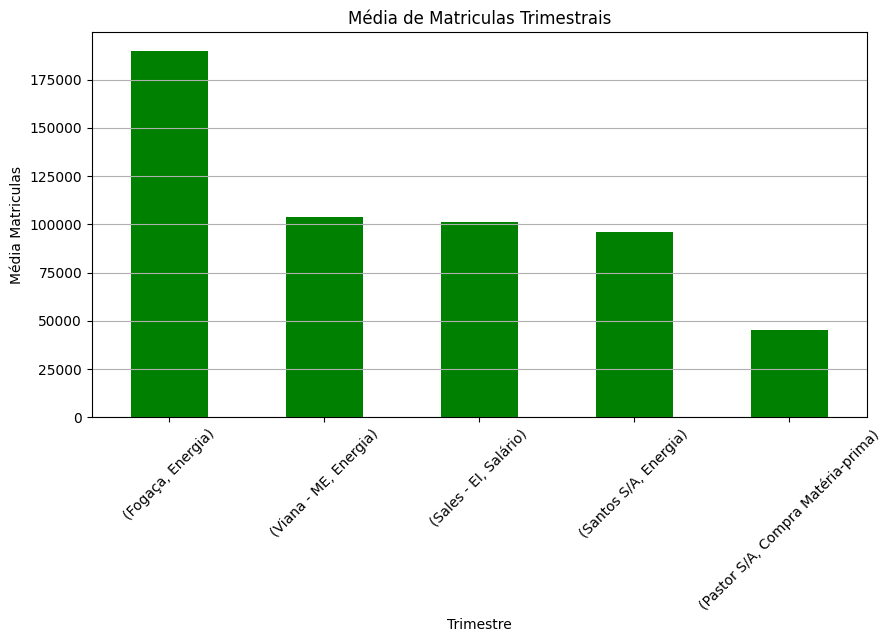

In [89]:
plt.figure(figsize=(10,5))
top_5.plot(kind="bar", color = "green")
plt.title("Média de Matriculas Trimestrais")
plt.xlabel("Trimestre")
plt.ylabel("Média Matriculas")
plt.xticks(rotation = 45)
plt.grid(axis = "y")
plt.show()

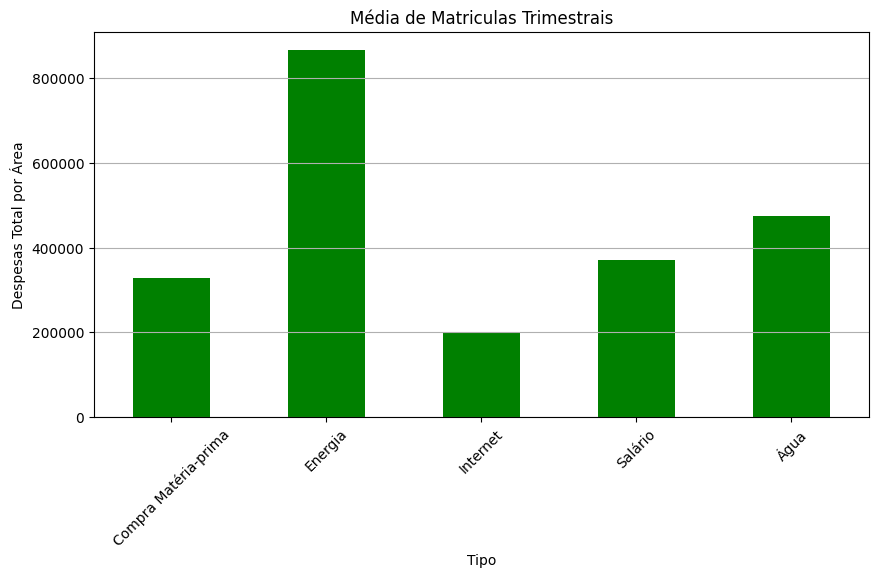

In [90]:
plt.figure(figsize=(10,5))
despesas_area_Total.plot(kind="bar", color = "green")
plt.title("Média de Matriculas Trimestrais")
plt.xlabel("Tipo")
plt.ylabel("Despesas Total por Área")
plt.xticks(rotation = 45)
plt.grid(axis = "y")
plt.show()

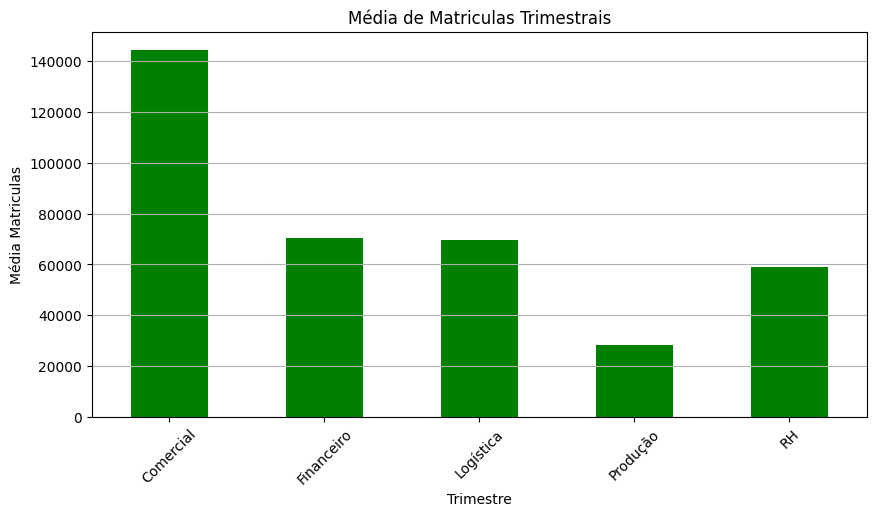

In [91]:
plt.figure(figsize=(10,5))
salario_area.plot(kind="bar", color = "green")
plt.title("Média de Matriculas Trimestrais")
plt.xlabel("Trimestre")
plt.ylabel("Média Matriculas")
plt.xticks(rotation = 45)
plt.grid(axis = "y")
plt.show()

In [92]:
display(df_orcamento)

,Id_despesa,Data,Tipo,Setor,Valor,Fornecedor,Trimestre
0,1,2024-08-01,Salário,Financeiro,11670.10,Teixeira,2024Q3
1,2,2024-09-01,Água,Logística,17394.82,Nunes,2024Q3
2,3,2024-08-01,Água,Financeiro,19787.46,Moura S/A,2024Q3
3,4,2024-09-01,Compra Matéria-prima,Produção,2159.77,Barros,2024Q3
4,5,2025-02-01,Internet,RH,7390.20,Mendes - EI,2025Q1
...,...,...,...,...,...,...,...
169,196,2024-10-01,Energia,Produção,15225.10,da Cunha Mendes e Filhos,2024Q4
170,197,2024-07-01,Salário,RH,16460.68,Pires e Filhos,2024Q3
171,198,2024-10-01,Água,Financeiro,12795.28,Nascimento,2024Q4
172,199,2024-08-01,Compra Matéria-prima,Logística,9634.17,da Costa,2024Q3
